In [44]:
#With NumPy

from time import time
import numpy as np
import numexpr as ne
import matplotlib.pyplot as plt

def calculate_chunksize(size):
    chunksize = size * 1024 // 8
    return chunksize


def calculate_time(ntotal,chunksize,dtype):
    a = np.linspace(0,10,num=ntotal,dtype=dtype)  ##I create an array that will have a number of elements with a value between 0 and 10
    b = np.linspace(0,10,num=ntotal,dtype=dtype)
    c = np.linspace(0,10,num=ntotal,dtype=dtype)
    d2 = np.empty(ntotal, dtype=dtype)
    pi = 0
    i = chunksize
    t0 = time()
    while i < ntotal:   #SLICE = a sight
        d2[pi:i] = a[pi:i] + b[pi:i] * c[pi:i]
        pi = i 
        i += chunksize 
    t = time() - t0
    return t

block_sizes = [ 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192 ]  # Varying block sizes(kilobytes)
execution_times = []
dtype = np.float64
ntotal = (256 * (10 ** 6)) // 8
for size in block_sizes:
    size_bytes = calculate_chunksize(size)
    execution_times.append(1 / calculate_time(ntotal, size_bytes, dtype))



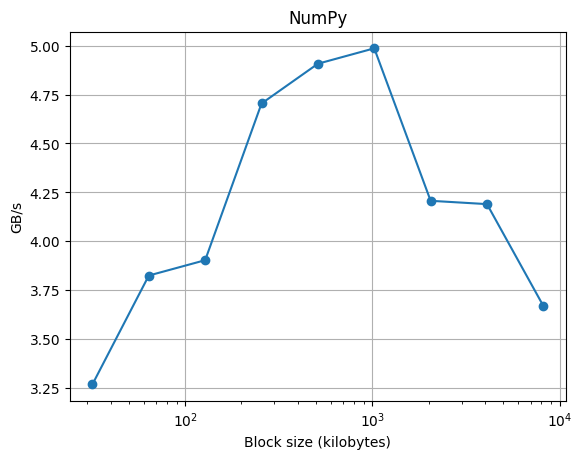

In [45]:
plt.plot(block_sizes, execution_times, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Block size (kilobytes)')
plt.ylabel('GB/s')
plt.title('NumPy')
plt.grid(True)
plt.show()

In [46]:
#With NumExpr

from time import time
import numpy as np
import numexpr as ne
import matplotlib.pyplot as plt


def calculate_chunksize2(size):
    chunksize = size * 1024 // 8
    return chunksize


def calculate_time2(ntotal, chunksize, dtype):
    a = np.linspace(0, 10, num=ntotal,
                    dtype=dtype)  ##I create an array that will have a number of elements with a value between 0 and 10
    b = np.linspace(0, 10, num=ntotal, dtype=dtype)
    c = np.linspace(0, 10, num=ntotal, dtype=dtype)
    d2 = np.empty(ntotal, dtype=dtype)
    pi = 0
    i = chunksize
    entradas = ["aa", "bb", "cc"]
    t0 = time()
    while i <= ntotal:  #SLICE = a sight
        views = [a[pi:i], b[pi:i], c[pi:i]]
        dicc = dict(zip(entradas, views))
        expr = "aa + bb * cc"  #Expressions do not accept operands, I have to tell it to access the dicc
        d2[pi: i] = ne.evaluate(expr,local_dict=dicc)
        pi = i
        i += chunksize
    t = time() - t0
    return t


block_sizes = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]  # Varying block sizes(kilobytes)
execution_times2 = []
dtype = np.float64
ntotal = (256 * (10 ** 6)) // 8
for size in block_sizes:
    size_bytes = calculate_chunksize2(size)
    execution_times2.append(1 / calculate_time2(ntotal, size_bytes, dtype))


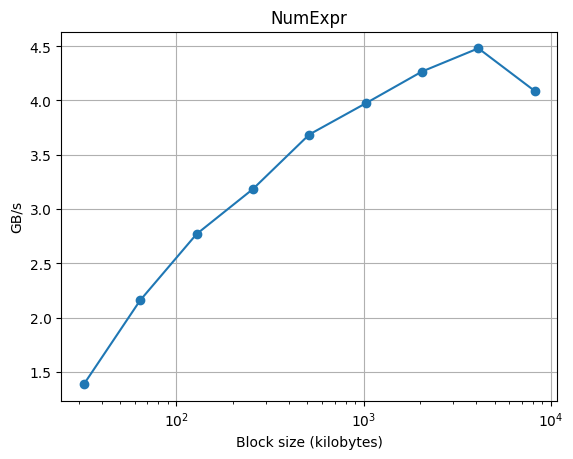

In [47]:

plt.plot(block_sizes, execution_times2, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Block size (kilobytes)')
plt.ylabel('GB/s')
plt.title('NumExpr')
plt.grid(True)
plt.show()

In [48]:
#With Blosc2

from time import time
import numpy as np
import blosc2
import matplotlib.pyplot as plt


def calculate_chunksize3(size):
    chunksize = size * 1024 // 8
    return chunksize


def calculate_time3(ntotal, chunksize, dtype):
    a = blosc2.zeros(shape=ntotal, dtype=dtype)  ##I create an array that will have a number of elements with a value between 0 and 10
    b = blosc2.zeros( shape=ntotal, dtype=dtype)
    c = blosc2.zeros( shape=ntotal, dtype=dtype)
    a1 = np.linspace(0,10,num=ntotal,dtype=dtype)  ##I create an array that will have a number of elements with a value between 0 and 10
    b1 = np.linspace(0,10,num=ntotal,dtype=dtype)
    c1 = np.linspace(0,10,num=ntotal,dtype=dtype)
    a[:] = a1
    b[:] = b1
    c[:] = c1
    d = blosc2.empty(ntotal, dtype=dtype)
    pi = 0
    i = chunksize
    t0 = time()
    while i <= ntotal:  #SLICE = a sight
        d[pi:i] = a[pi:i] + b[pi:i] * c[pi:i]
        pi = i
        i += chunksize
    t = time() - t0
    return t


block_sizes = [ 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]  # Varying block sizes(kilobytes)
execution_times3 = []
dtype = np.float64
ntotal = (256 * (10 ** 6)) // 8
for size in block_sizes:
    size_bytes = calculate_chunksize3(size)
    print( f"{size_bytes}")
    execution_times3.append(1 / calculate_time3(ntotal, size_bytes, dtype))

4096
8192
16384
32768
65536
131072
262144
524288
1048576


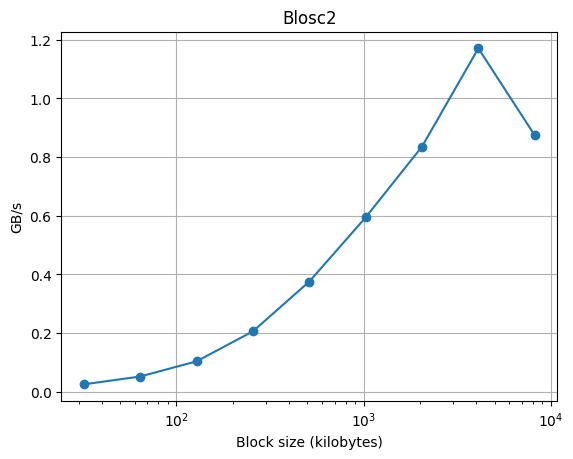

In [49]:

plt.plot(block_sizes, execution_times3, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Block size (kilobytes)')
plt.ylabel('GB/s')
plt.title('Blosc2')
plt.grid(True)
plt.show()

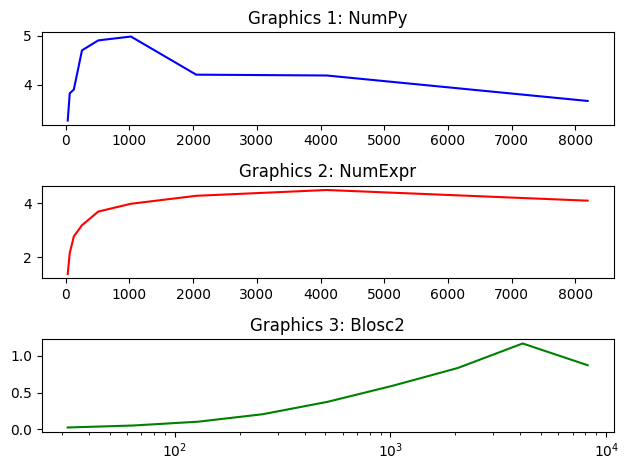

In [50]:
# Create the figure and the axes (subgraphs)
fig, axs = plt.subplots(3)

# Graph on the first subgraph
axs[0].plot(block_sizes, execution_times, color='blue')
axs[0].set_title('Graphics 1: NumPy')

# Graph on the second subgraph
axs[1].plot(block_sizes, execution_times2, color='red')
axs[1].set_title('Graphics 2: NumExpr')

# Graph on the third subgraph
axs[2].plot(block_sizes, execution_times3, color='green')
axs[2].set_title('Graphics 3: Blosc2')
plt.xscale('log')
# Adjust the layout
plt.tight_layout()

# Show the graph
plt.show()

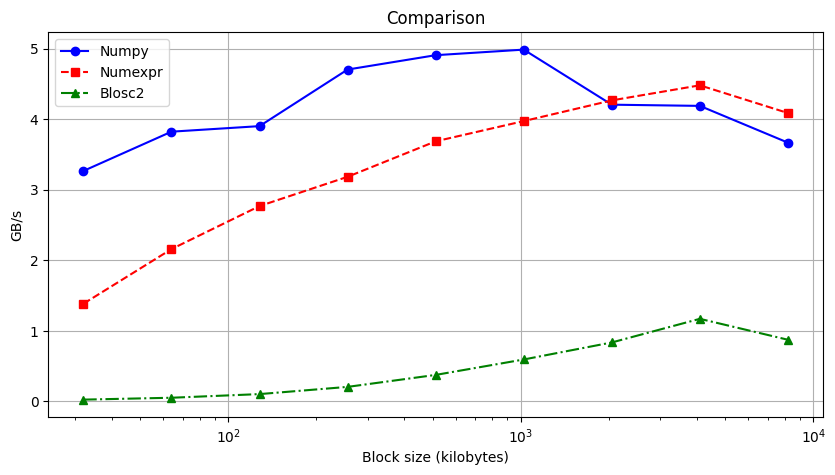

In [51]:
# Create the figure and line graph
plt.figure(figsize=(10, 5))

#Line chart 1
plt.plot(block_sizes, execution_times, marker='o', linestyle='-', color='b', label='Numpy')

#Line chart 2
plt.plot(block_sizes, execution_times2, marker='s', linestyle='--', color='r', label='Numexpr')

#Line Chart 3
plt.plot(block_sizes, execution_times3, marker='^', linestyle='-.', color='g', label='Blosc2')

# Add title and legend
plt.xscale('log')
plt.title('Comparison')
plt.xlabel('Block size (kilobytes)')
plt.ylabel('GB/s')
plt.legend()

# Show the graph
plt.grid(True)
plt.show()